Complete the exercises below For **Assignment #5**.

In this exercise, we are building a logistic regression classification model. We'll work with the [Pima Indians Diabetes Database](https://www.kaggle.com/datasets/uciml/pima-indians-diabetes-database).  

Load the `tidymodels` library. 

In [2]:
library('tidymodels')

Warning message:
“Your system is mis-configured: ‘/var/db/timezone/localtime’ is not a symlink”
Warning message:
“‘/var/db/timezone/localtime’ is not identical to any known timezone file”
── Attaching packages ────────────────────────────────────── tidymodels 1.4.1 ──

✔ broom        1.0.9     ✔ recipes      1.3.1
✔ dials        1.4.2     ✔ rsample      1.3.1
✔ dplyr        1.1.4     ✔ tailor       0.1.0
✔ ggplot2      3.5.2     ✔ tidyr        1.3.1
✔ infer        1.0.9     ✔ tune         2.0.0
✔ modeldata    1.5.1     ✔ workflows    1.3.0
✔ parsnip      1.3.3     ✔ workflowsets 1.1.1
✔ purrr        1.1.0     ✔ yardstick    1.3.2

── Conflicts ───────────────────────────────────────── tidymodels_conflicts() ──
✖ purrr::discard() masks scales::discard()
✖ dplyr::filter()  masks stats::filter()
✖ dplyr::lag()     masks stats::lag()
✖ recipes::step()  masks stats::step()



The data is located in your homework directory in the `diabetes.csv` file. Read in the data by running the following cell. We are "splitting" the data into training and testing sets. We will evaluate our model's performance with the test set.

In [17]:
diabetes = readr::read_csv('diabetes.csv') |> mutate(Outcome = factor(Outcome))

split = initial_split(diabetes, strata = Outcome)

diabetes_train = training(split)
diabetes_test = testing(split)

Rows: 768 Columns: 9
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
dbl (9): Pregnancies, Glucose, BloodPressure, SkinThickness, Insulin, BMI, D...

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


Glimpse the `diabetes_train` table.

In [5]:
glimpse(diabetes_train)

Rows: 576
Columns: 9
$ Pregnancies              <dbl> 1, 1, 5, 10, 4, 10, 1, 8, 6, 10, 4, 11, 3, 7,…
$ Glucose                  <dbl> 85, 89, 116, 115, 110, 139, 103, 99, 92, 122,…
$ BloodPressure            <dbl> 66, 66, 74, 0, 92, 80, 30, 84, 92, 78, 60, 76…
$ SkinThickness            <dbl> 29, 23, 0, 0, 0, 0, 38, 0, 0, 31, 33, 0, 25, …
$ Insulin                  <dbl> 0, 94, 0, 0, 0, 0, 83, 0, 0, 0, 192, 0, 70, 0…
$ BMI                      <dbl> 26.6, 28.1, 25.6, 35.3, 37.6, 27.1, 43.3, 35.…
$ DiabetesPedigreeFunction <dbl> 0.351, 0.167, 0.201, 0.134, 0.191, 1.441, 0.1…
$ Age                      <dbl> 31, 21, 30, 29, 30, 57, 33, 50, 28, 45, 33, 3…
$ Outcome                  <fct> 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, …


❓ Which variable is suitable as the "outcome" in a logistic regression model?

**Answer:** The Outcome variable in the file would appear to be suitable, it gives a 1 or 0 values to represent if someone has diabetes similar to our binary models in class that classifies our penguins based on bill length. 

❓ Navigate to [Kaggle page](https://www.kaggle.com/datasets/mathchi/diabetes-data-set) for this dataset. Find descriptions for the `Glucose` and `BMI` columns. Add these descriptions to the [Markdown table](https://www.markdownguide.org/extended-syntax/#tables) below.

| Column name | Description |
| :---------- | :---------- |
| Glucose     |Plasma glucose concentration a 2 hours in an oral glucose tolerance test|
| BMI         |Body mass index (weight in kg/(height in m)^2)|

Make a bar chart showing the frequency of each "outcome" in the `Outcome` column from your `diabetes_train` data.

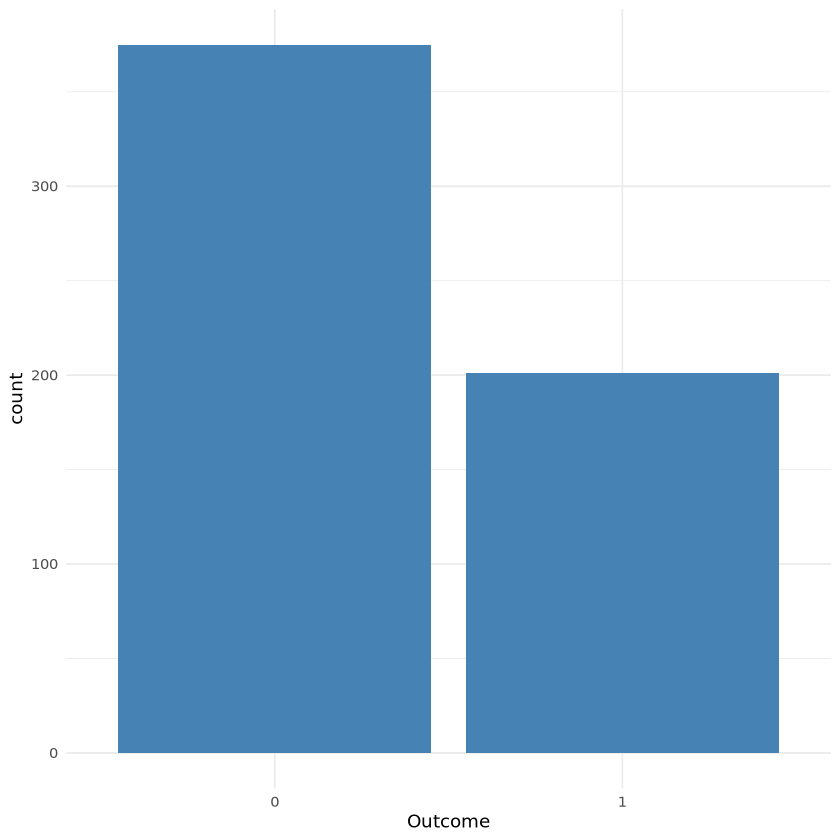

In [23]:
library(ggplot2)

ggplot(diabetes_train, aes(x = Outcome)) +
  geom_bar(fill = "steelblue") +
  theme_minimal()

❓ Is the data balanced? I.e. do we have equal counts of each outcome?

**Answer:** No, we have more people without than with.

Run the code below to create a table for plotting the predictors we will use in our model: `Glucose` and `BMI`. 

In [12]:
plot_df = diabetes_train |>
    select(Outcome, Glucose, BMI) |>
    pivot_longer(cols = c(Glucose, BMI))

plot_df |> head()

Outcome,name,value
<fct>,<chr>,<dbl>
0,Glucose,85.0
0,BMI,26.6
0,Glucose,89.0
0,BMI,28.1
0,Glucose,116.0
0,BMI,25.6


Using `plot_df`, make a chart showing the relationship of `Glucose` and `BMI` with `Outcome`. 

- use `geom_jitter` for your "geom"
- `facet_wrap` your chart by the `name` variable. (e.g. `facet_wrap(~name, ncol = 2, scales = 'free_x')`)

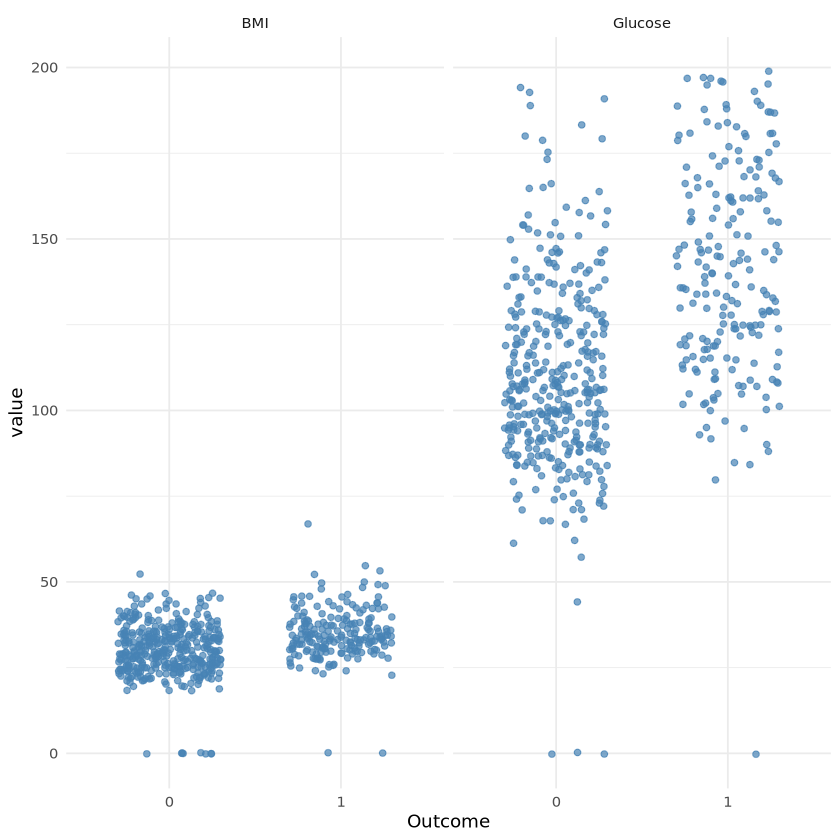

In [25]:
ggplot(plot_df, aes(x = Outcome, y = value)) +
  geom_jitter(color = "steelblue", width = 0.3, height = 0.3, alpha = 0.7) +
  facet_wrap(~name, ncol = 2, scales = 'free_x') +
  theme_minimal()

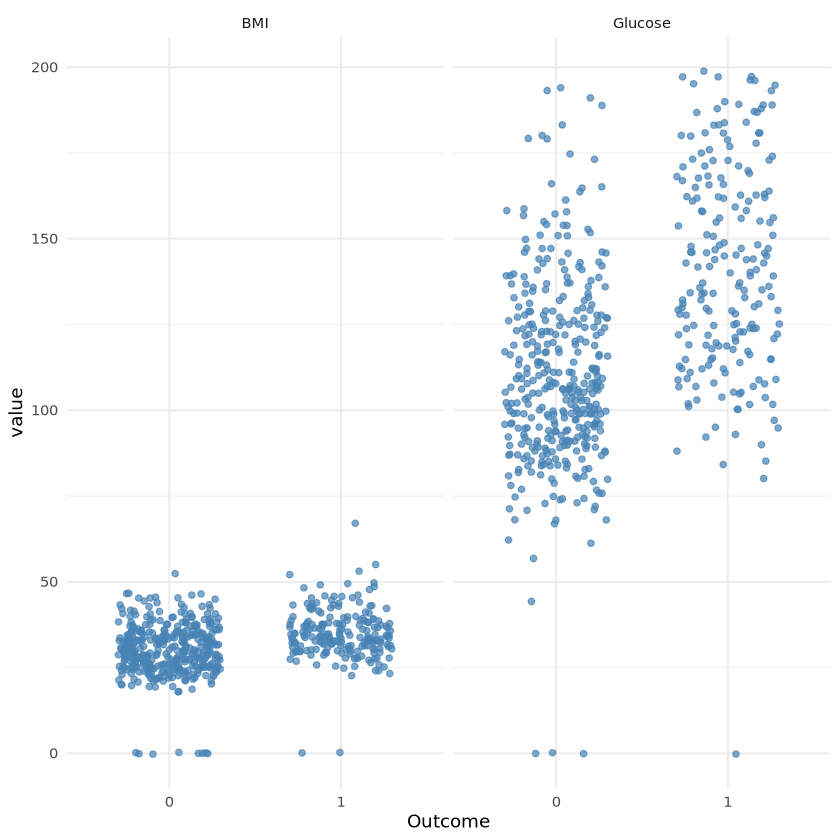

In [26]:
ggplot(plot_df, aes(x = Outcome, y = value)) +
  geom_jitter(color = "steelblue", width = 0.3, height = 0.3, alpha = 0.7) +
  facet_wrap(~name, ncol = 2) +
  theme_minimal()

❓ What happens when you remove the `scales = 'free_x'` argument from the `facet_wrap` function?

**Answer:** When we remove scales = 'free_x', all facets in the plot share the same x-axis scale. Since the x-axis is Outcome and likely has the same values across facets (0 and 1), the visual result doesn’t change much. This option only makes a difference when each facet has a different range or type of x-values.

Using your training data, build logistic regression model of `Outcome` with `BMI` and `Glucose` as predictors. 
- Use "glm" for you engine
- The formula for your fit function will be `Outcome ~ BMI + Glucose`

In [29]:
logistic_model <- logistic_reg() %>%
  set_engine("glm") %>%
  set_mode("classification")

logistic_fit <- logistic_model %>%
  fit(Outcome ~ BMI + Glucose, data = diabetes_train)

summary(logistic_model)
summary(logistic_fit)

                      Length Class    Mode     
args                  2      -none-   list     
eng_args              0      quosures list     
mode                  1      -none-   character
user_specified_mode   1      -none-   logical  
method                0      -none-   NULL     
engine                1      -none-   character
user_specified_engine 1      -none-   logical  

             Length Class        Mode     
lvl           2     -none-       character
ordered       1     -none-       logical  
spec          8     logistic_reg list     
fit          30     glm          list     
preproc       1     -none-       list     
elapsed       2     -none-       list     
censor_probs  0     -none-       list     

Using `augment` with your fitted model and the `diabetes_test` data as arguments, create a new dataset called `diabetes_test_wPred` that is the `diabetes_test` table including predictions from your model. 

In [45]:
library(broom)

diabetes_test_wPred <- augment(logistic_fit, new_data = diabetes_test)

head(diabetes_test_wPred)

.pred_class,.pred_0,.pred_1,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
<fct>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<fct>
0,0.6780134,0.3219866,10,115,0,0,0,35.3,0.134,29,0
1,0.1412531,0.8587469,2,197,70,45,543,30.5,0.158,53,1
0,0.6722144,0.3277856,10,139,80,0,0,27.1,1.441,57,0
1,0.1878247,0.8121753,1,189,60,23,846,30.1,0.398,59,1
0,0.8384551,0.1615449,7,107,74,0,0,29.6,0.254,31,1
1,0.4776977,0.5223023,3,126,88,41,235,39.3,0.704,27,0


Run the code below to generate a confusion matrix for your model predictions. 

(❗️Hint: See Table 4.4 from [*Introduction to Statistical Learning (Version 2)*](https://www.statlearning.com/) for an example confusion matrix.)

In [44]:
diabetes_test_wPred = augment(logistic_fit, new_data = diabetes_test)

diabetes_test_wPred |> conf_mat(Outcome, .pred_class)

          Truth
Prediction   0   1
         0 105  34
         1  20  33

❓ Based on the confusion matrix above, 
- How many individuals had diabetes in your test data?
- Of those that actually had diabetes, how many were predicted to have diabetes by your model?
- How many individuals predicted to have diabetes did not have diabetes?

**Answer:** There were 67 people who had diabetes in the test data, 33 of those were correct, 20 individuals receieved false positives. 